# 손글씨 숫자 식별 모델
---
- 데이터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작 : 0 ~ 9사이의 숫자 판별

In [1]:
# 모듈로딩
from keras import Sequential  # 모댈 객체
from keras.layers import Dense, Dropout, Flatten  # layer 객체
from keras.datasets.mnist import load_data
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import plot_model
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# import numpy as np

# [1] 데이터 로딩 및 준비

In [2]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# 검증용 데이터셋 준비
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  stratify=y_train)
x_train.shape, x_val.shape

((45000, 28, 28), (15000, 28, 28))

# [2] 데이터 전처리
- 수치형 데이터 => 스케일링
- 범주형 데이터 => One-Hot 인코딩

In [4]:
# plt.imshow(x_train[0])
# plt.show()

In [5]:
# 이미지 데이터의 픽셀 값 => feature => 0 ~ 1사이로 변환
x_train_scaled = x_train / 255.0
x_val_scaled = x_val / 255.0
x_test_scaled = x_test / 255.0

In [6]:
# 타겟 라벨 => One-Hot 인코딩
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1, 1))
y_train_encoded = encoder.transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.reshape(-1, 1))

In [7]:
y_train_encoded = y_train_encoded.toarray()
y_test_encoded = y_test_encoded.toarray()
y_val_encoded = y_val_encoded.toarray()

# [3] 모델 생성
1) 모델 구성
2) 모델 생성

### [3-1] 모델 구성
- 입력 데이터 : 784개 (28*28 픽셀 이미지 데이터)
- 출력 데이터 : 10개  (0 ~ 9의 숫자 라벨)
- 학습 방법 : 분류 => 다중분류

In [8]:
# Sequential 생성
model = Sequential(name='MNIST_NNModel')

In [9]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화 함수, (옵션 : input_shape param)
model.add(Dense(250, activation='relu', input_shape=(784,), name='input'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(100, activation='relu', name='hidden_1'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(10, activation='softmax', name='output'))

In [10]:
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


### [3-2] 모델 생성
- loss => crossentropy
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy, sparse_categorical_crossentropy
- optimizer => Default : rmsprop
- metrics => Default : 'loss'

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

# [4] 학습

In [12]:
callBack = EarlyStopping(monitor='val_loss',
                         patience=2)

In [13]:
MODEL_PATH = r'model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB = ModelCheckpoint(filepath=MODEL_PATH)
                          # save_weights_only=True)
                          # save_best_only=True)

In [14]:
model_hist = model.fit(x_train_scaled.reshape(-1, 28 * 28),
                       y_train_encoded,
                       epochs=10,
                       validation_data=(x_val_scaled.reshape(-1, 28 * 28), y_val_encoded),
                       callbacks=[callBack,modelCB])

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 0.4929 - accuracy: 0.8493 - val_loss: 0.1745 - val_accuracy: 0.9493
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2586 - accuracy: 0.9250 - val_loss: 0.1358 - val_accuracy: 0.9590
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2127 - accuracy: 0.9386 - val_loss: 0.1152 - val_accuracy: 0.9650
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1857 - accuracy: 0.9448 - val_loss: 0.1115 - val_accuracy: 0.9666
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1682 - accuracy: 0.9507 - val_loss: 0.1056 - val_accuracy: 0.9689
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1607 - accuracy: 0.9535 - val_loss: 0.0962 - val_accuracy: 0.9719
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1458 - accuracy: 0.9566 - val_loss: 0.0899 - val_accuracy:

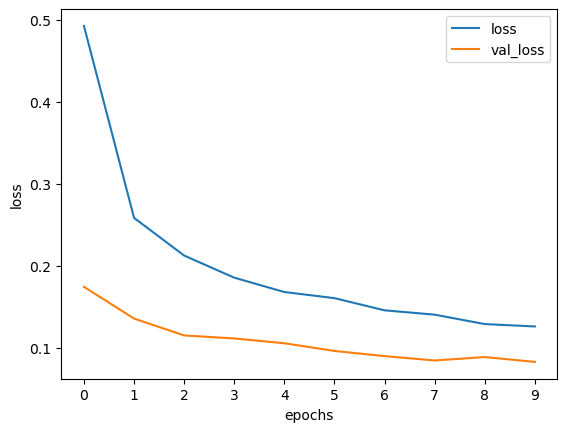

In [15]:
plt.plot(model_hist.epoch, model_hist.history['loss'], label='loss')
plt.plot(model_hist.epoch, model_hist.history['val_loss'], label='val_loss')
plt.xticks(model_hist.epoch)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

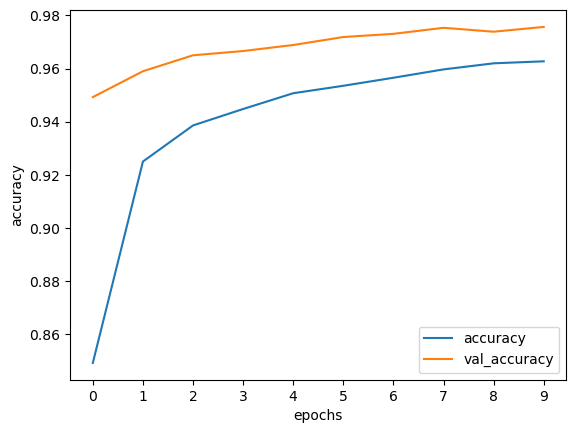

In [16]:
plt.plot(model_hist.epoch, model_hist.history['accuracy'], label='accuracy')
plt.plot(model_hist.epoch, model_hist.history['val_accuracy'], label='val_accuracy')
plt.xticks(model_hist.epoch)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# [5] 평가
- evaluate() 메서드
    - test data, target 사용
    - 반환값
        - Default : loss
        - 추가 : metrics에서 지정한 성능평가 항목 지표

In [17]:
test_tesult = model.evaluate(x_test_scaled.reshape(-1, 28*28), y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9746


# [6] 테스트/예측

In [18]:
print(model.predict(x_test_scaled[6].reshape(-1,28*28)))
print(y_test[6])

1/1 [==============================] - 0s 140ms/step
[[2.3205206e-10 2.6693139e-10 1.7703268e-09 8.9502614e-11 9.9945825e-01
  8.3560465e-08 2.5645780e-10 1.2547656e-07 6.0954258e-06 5.3544663e-04]]
4


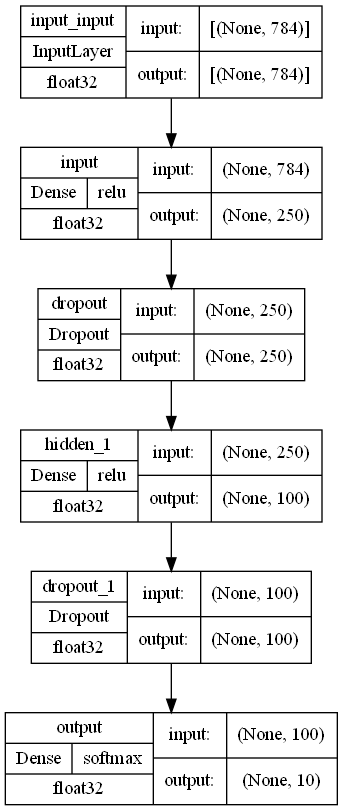

In [21]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_activations=True)